In [1]:
import os

# IMPORTANT: Replace with your actual Twitch application credentials
os.environ["TWITCH_CLIENT_ID"] = "pgapguj2m5e5mm637jg1sx952kjdzw"
os.environ["TWITCH_CLIENT_SECRET"] = "du7gazte4165jh8rn8w4pao37zpazi"

print("TWITCH_CLIENT_ID and TWITCH_CLIENT_SECRET environment variables set.")

TWITCH_CLIENT_ID and TWITCH_CLIENT_SECRET environment variables set.


In [2]:
import pandas as pd
import os
from pathlib import Path

# Find the latest games CSV file in the 'igdb_csv' directory
outdir = Path("igdb_csv")
if outdir.exists():
	try:
		latest_games_file = sorted(outdir.glob("games_*.csv"), reverse=True)[0]
		print(f"Loading data from: {latest_games_file}")
		df = pd.read_csv(latest_games_file)
		print(df.head())  # show first 5 rows
	except IndexError:
		print("No games CSV file found in 'igdb_csv' directory.")
		print("Please run the data download cell first.")
else:
	print("'igdb_csv' directory not found.")
	print("Please run the data download cell first to create it.")

Loading data from: igdb_csv/games_20251015_1657.csv
   id  aggregated_rating aggregated_rating_count first_release_date   genres  \
0   1          90.000000                     1.0          953596800  5|13|31   
1   2          70.000000                     1.0          912384000    13|31   
2   3          83.000000                     2.0         1085443200  5|13|31   
3   4          63.642857                    14.0         1393286400     5|31   
4   5                NaN                     NaN          914198400       12   

                      name        platforms                    slug  \
0  Thief II: The Metal Age                6  thief-ii-the-metal-age   
1  Thief: The Dark Project                6  thief-the-dark-project   
2    Thief: Deadly Shadows             11|6    thief-deadly-shadows   
3                    Thief  9|48|6|14|12|49                   thief   
4            Baldur's Gate        3|6|39|14           baldur-s-gate   

   total_rating  total_rating_count    u

In [105]:
import pandas as pd
from pathlib import Path

# Adjust timestamp to your generated CSVs
ts = "20251015_1600"  
outdir = Path("igdb_csv")

games = pd.read_csv(outdir / f"games_20251001_1633.csv")
popularity_primitives = pd.read_csv(outdir / f"popularity_primitives_20251015_1657.csv")
popularity_types = pd.read_csv(outdir / f"popularity_types_20251001_1809.csv")

# Adding game_time_to_beats to explore top games based on playtime weighted popularity score
game_time_to_beats = pd.read_csv(outdir / f"game_time_to_beats_20251015_1657.csv")

In [4]:
popularity_joined = popularity_primitives.merge(
    popularity_types,
    left_on="popularity_type",
    right_on="id",
    how="left"
)


In [5]:
popularity_with_games = popularity_joined.merge(
    games[["id", "name", "slug"]],
    left_on="game_id",
    right_on="id",
    how="left",
)

In [6]:
popularity_with_games = popularity_joined.merge(
    games[["id", "name", "slug"]],
    left_on="game_id",
    right_on="id",
    how="left",
    suffixes=("_poptype", "_game")
)

# Rename columns for clarity
popularity_with_games = popularity_with_games.rename(columns={
    "name_game": "game_name",
    "name_poptype": "popularity_name"
})


In [7]:
top_games = (
    popularity_with_games.groupby("game_name")["value"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
print(top_games)


game_name
grand-theft-auto-v               0.003479
cyberpunk-2077                   0.002967
the-witcher-3-wild-hunt          0.002921
142.0                            0.002338
Minecraft: Java Edition          0.002044
fortnite                         0.001801
The Elder Scrolls V: Skyrim      0.001695
Portal 2                         0.001652
Grand Theft Auto: San Andreas    0.001547
Portal                           0.001320
Name: value, dtype: float64


In [12]:
popularity_with_games.to_csv("igdb_popularity_by_game.csv", index=False)
print("✅ Saved merged popularity dataset.")


✅ Saved merged popularity dataset.


In [104]:
top_games = (
    popularity_with_games.groupby("game_name")["value"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)
print(top_games)

game_name
grand-theft-auto-v               0.003479
cyberpunk-2077                   0.002967
the-witcher-3-wild-hunt          0.002921
142.0                            0.002338
Minecraft: Java Edition          0.002044
fortnite                         0.001801
The Elder Scrolls V: Skyrim      0.001695
Portal 2                         0.001652
Grand Theft Auto: San Andreas    0.001547
Portal                           0.001320
Name: value, dtype: float64


In [102]:
# NOTE: 'top_games_output' will output a pandas DataFrame rather than a series. Using pd.dataframe will make further integration easier such as merging and plotting.
top_games_df = (
    popularity_with_games
    .groupby("game_name", as_index=False)
    .agg({"value": "mean"})
    .sort_values(by="value", ascending=False)
    .head(10)
)
print(top_games_df)

                          game_name     value
5049             grand-theft-auto-v  0.003479
4235                 cyberpunk-2077  0.002967
7492        the-witcher-3-wild-hunt  0.002921
24                            142.0  0.002338
1861        Minecraft: Java Edition  0.002044
4864                       fortnite  0.001801
2892    The Elder Scrolls V: Skyrim  0.001695
2190                       Portal 2  0.001652
1311  Grand Theft Auto: San Andreas  0.001547
2189                         Portal  0.001320


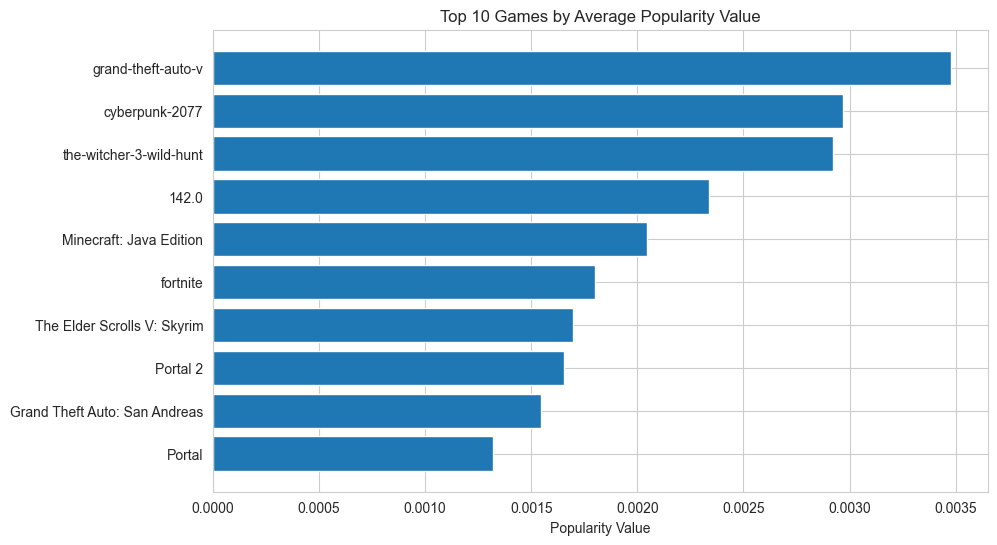

In [ ]:
# What are the most popular games by popularity value?
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top_games_df["game_name"], top_games_df["value"])
plt.gca().invert_yaxis()
plt.title("Top 10 Games by Average Popularity Value")
plt.xlabel("Popularity Value")
plt.show()

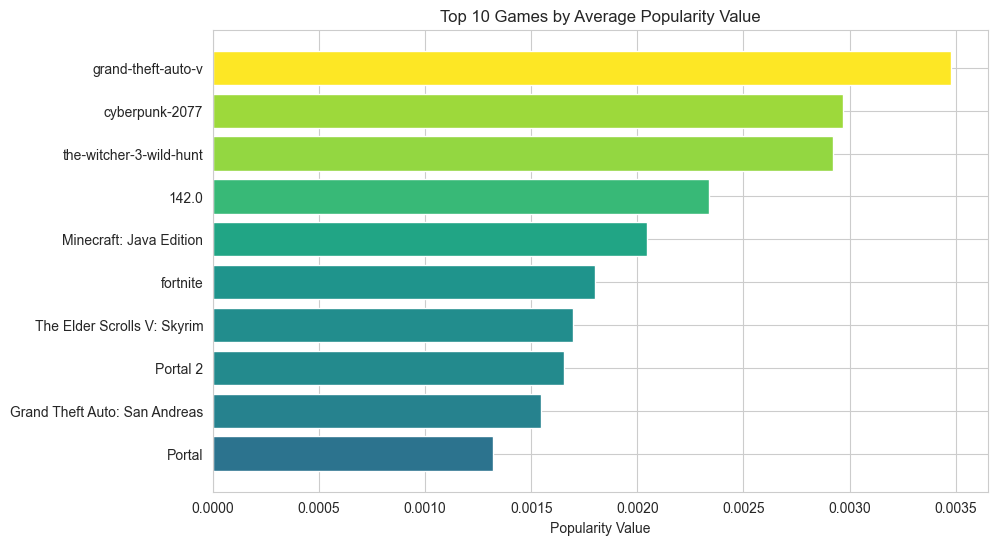

In [56]:
# Updated with color to highlight games with highest popularity value
# What are the most popular games by popularity value?
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
colors = plt.cm.viridis(top_games_df["value"] / top_games_df["value"].max())
plt.barh(top_games_df["game_name"], top_games_df["value"], color=colors)
plt.gca().invert_yaxis()
plt.title("Top 10 Games by Average Popularity Value")
plt.xlabel("Popularity Value")
plt.show()

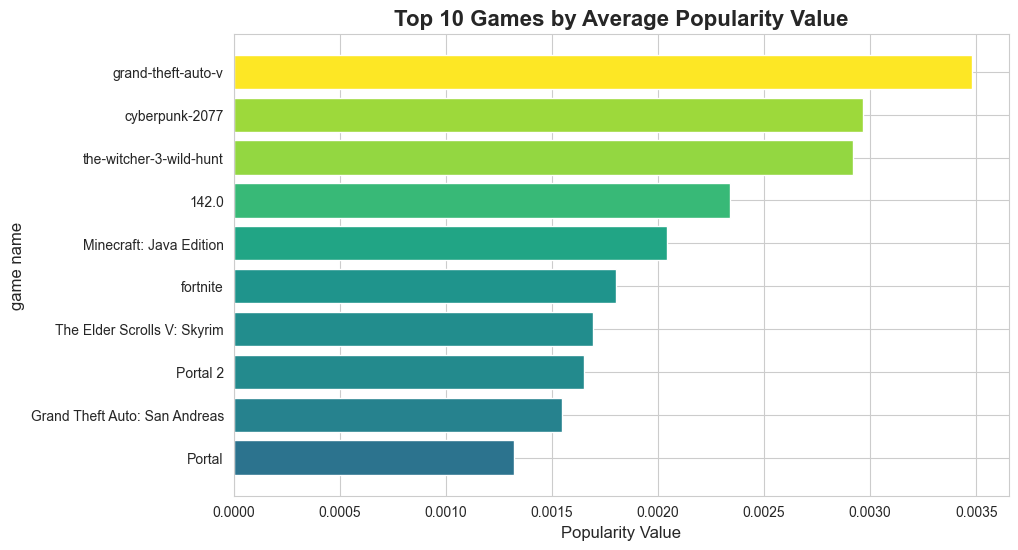

In [57]:
# Bolded title, added yaxis 'name game', increased font size
# What are the most popular games by popularity value?
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
colors = plt.cm.viridis(top_games_df["value"] / top_games_df["value"].max())
plt.barh(top_games_df["game_name"], top_games_df["value"], color=colors)
plt.gca().invert_yaxis()
plt.title("Top 10 Games by Average Popularity Value", fontsize=16, fontweight="bold")
plt.xlabel("Popularity Value", fontsize=12)
plt.ylabel("game name", fontsize=12)
plt.show()

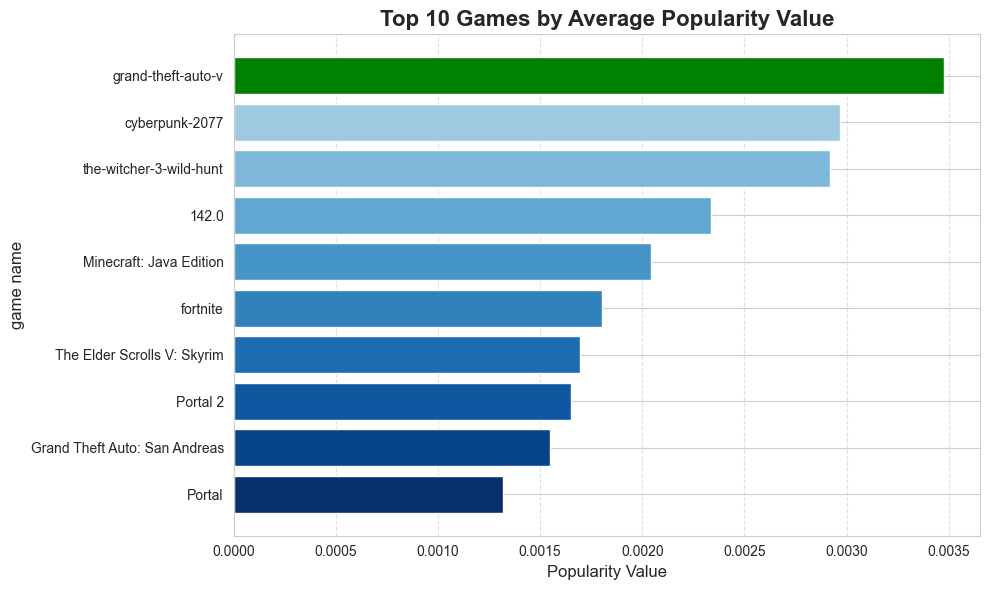

In [106]:
# Final Result: Top 10 games by Average Popularity Value
    # 1) Grand-Theft-Auto-V
    # 2) Cyberpunk-2077
    # 3) The-Witcher-3-Wild-Hunt


# Importing seaborn, adding white grid
# What are the most popular games by popularity value?
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")


plt.figure(figsize=(10,6))
colors = plt.cm.Blues(np.linspace(0.3, 1, len(top_games_df)))
colors[0] = [0.0, 0.5, 0.0, 1.0]  # dark green RGBA for top bar
plt.barh(top_games_df["game_name"], top_games_df["value"], color=colors)
plt.gca().invert_yaxis()
plt.title("Top 10 Games by Average Popularity Value", fontsize=16, fontweight="bold")
plt.xlabel("Popularity Value", fontsize=12)
plt.ylabel("game name", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Exploratory Idea #2: Analyze top 10 video games based on playtime weighted popularity score
# What are the most popular video games based on player engagement; Looking into how long people play specific video games for



